In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Google_train_data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [6]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [7]:
df.Date= pd.to_datetime(df.Date)

In [8]:
df2 =df.set_index('Date')
df2

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,"623,400"
2016-12-27,790.68,797.86,787.66,791.55,"789,100"
2016-12-28,793.70,794.23,783.20,785.05,"1,153,800"


In [9]:
df2['Volume'] = df2['Volume'].str.replace(',', '').astype(float)    #unique to the google_test_data.csv
df2['Close'] = df2['Close'].str.replace(',', '').astype(float)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   float64
 4   Volume  1258 non-null   float64
dtypes: float64(5)
memory usage: 59.0 KB


In [11]:
df2

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,7380500.0
2012-01-04,331.27,333.87,329.08,666.45,5749400.0
2012-01-05,329.83,330.75,326.89,657.21,6590300.0
2012-01-06,328.34,328.77,323.68,648.24,5405900.0
2012-01-09,322.04,322.29,309.46,620.76,11688800.0
...,...,...,...,...,...
2016-12-23,790.90,792.74,787.28,789.91,623400.0
2016-12-27,790.68,797.86,787.66,791.55,789100.0
2016-12-28,793.70,794.23,783.20,785.05,1153800.0


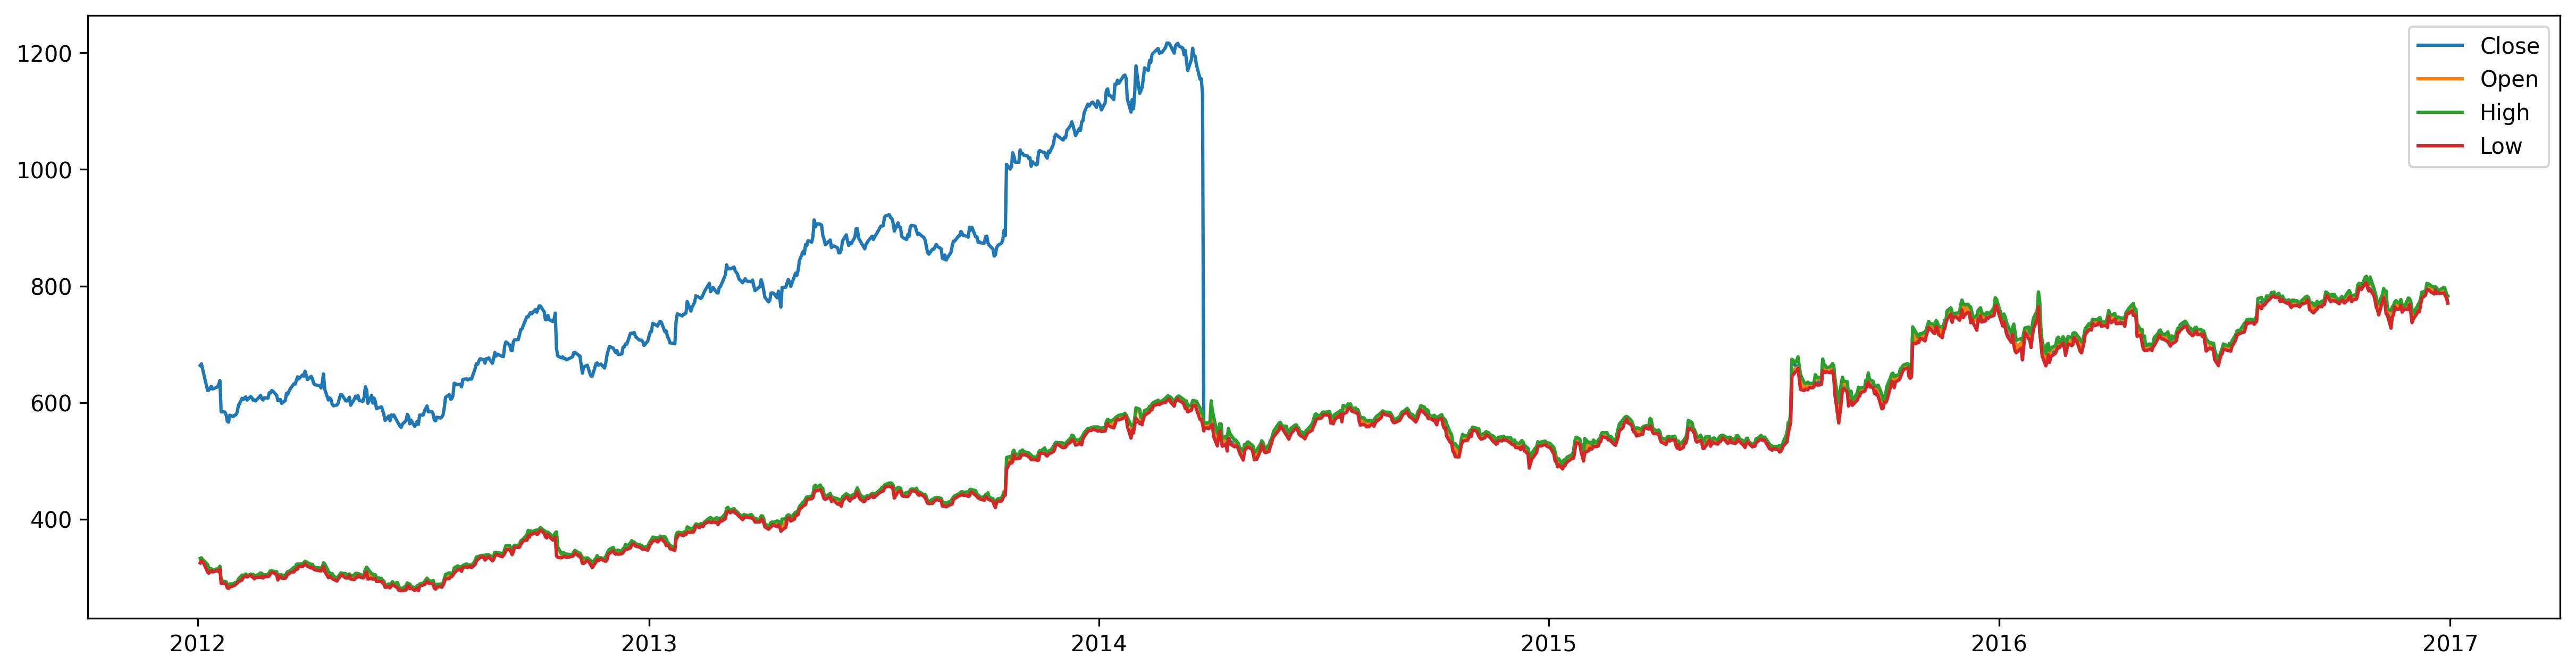

In [12]:
plt.figure(figsize=(20,5),dpi=300)
plt.plot(df2.Close,label='Close')
plt.plot(df2.Open,label='Open')
plt.plot(df2.High,label='High')
plt.plot(df2.Low,label='Low')
plt.legend()
plt.show()        #data wrong close > high & open

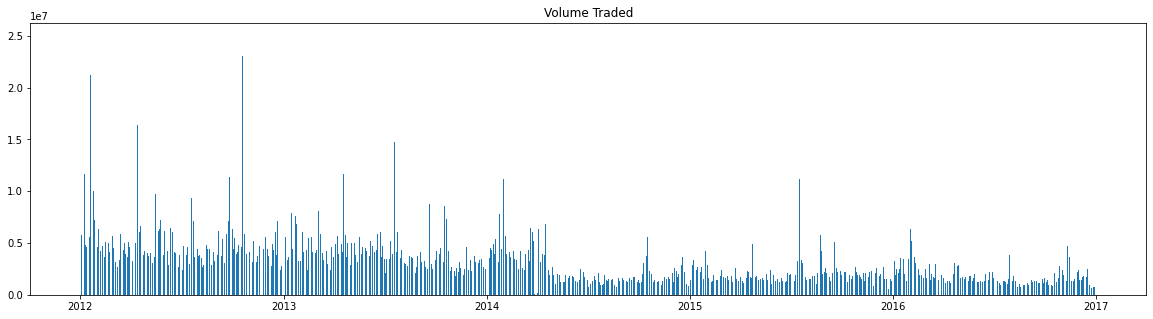

In [13]:
plt.figure(figsize=(20,5))
plt.bar(x=df2.index,height=df2['Volume'])
plt.title('Volume Traded')
plt.show()

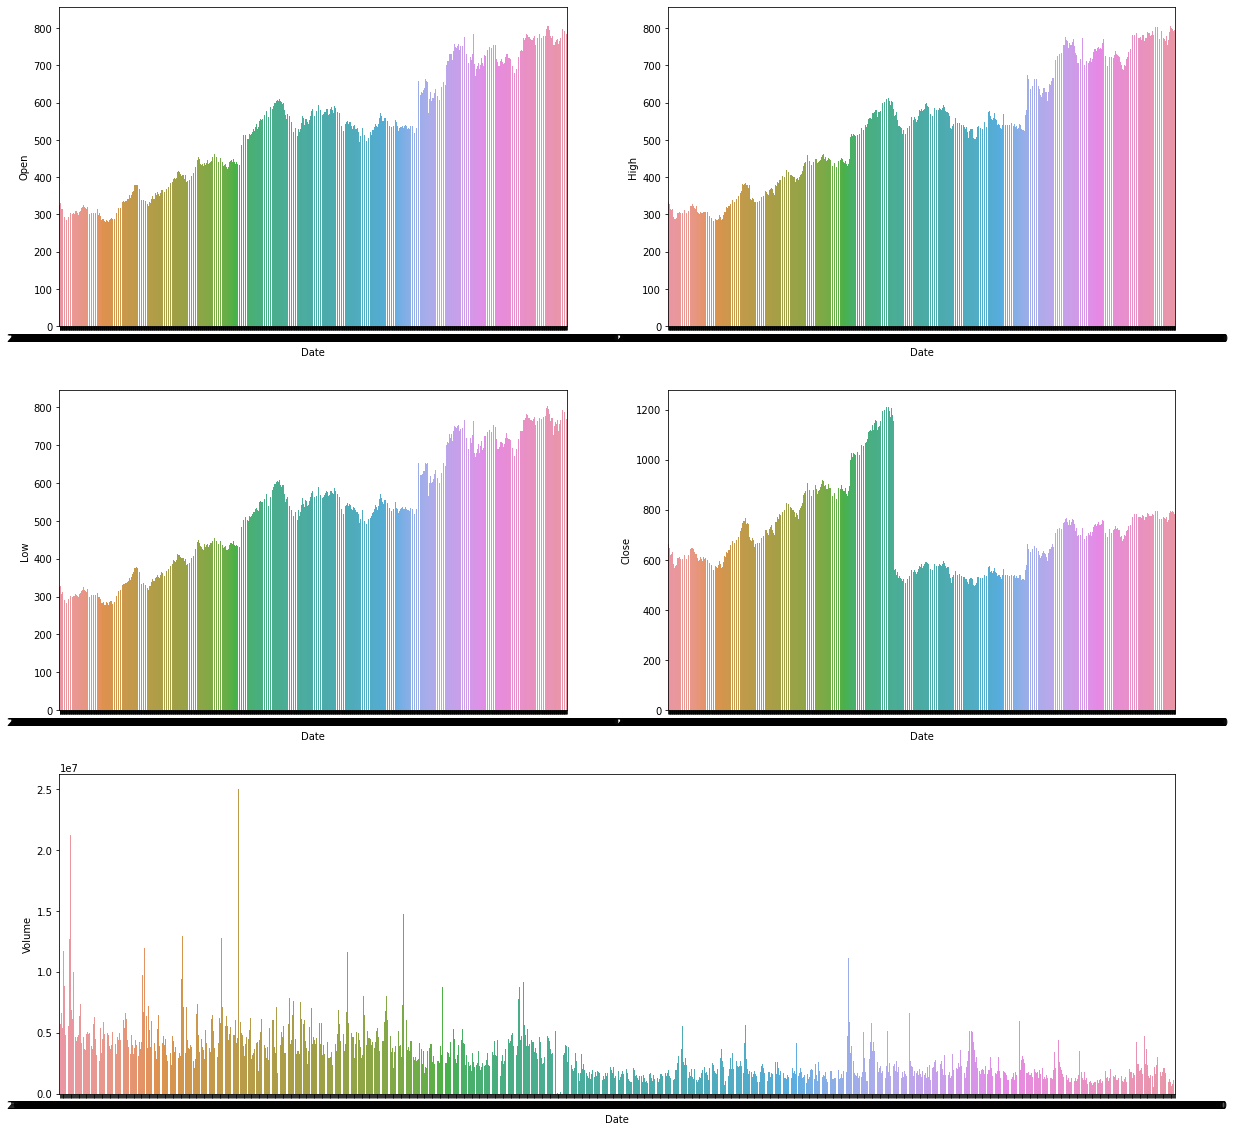

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(3, 2, 1)
sns.barplot(x=df2.index,y=df2['Open'])
plt.subplot(3, 2, 2)
sns.barplot(x=df2.index,y=df2['High'])
plt.subplot(3, 2, 3)
sns.barplot(x=df2.index,y=df2['Low'])
plt.subplot(3, 2, 4)
sns.barplot(x=df2.index,y=df2['Close'])
plt.subplot(3, 1, 3)
sns.barplot(x=df2.index,y=df2['Volume'])

plt.show()

# Regression :

In [69]:
x = df2.iloc[:,[0,1,2,4]].values  # [Open,High,Low,Volume]
x
y = df2["Close"]
y

Date
2012-01-03    663.59
2012-01-04    666.45
2012-01-05    657.21
2012-01-06    648.24
2012-01-09    620.76
               ...  
2016-12-23    789.91
2016-12-27    791.55
2016-12-28    785.05
2016-12-29    782.79
2016-12-30    771.82
Name: Close, Length: 1258, dtype: float64

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
print(scaler)
x_train_scaled = scaler.transform(x_train)
x_train_scaled

StandardScaler()


array([[-1.27371031, -1.2810589 , -1.26352722,  0.1640199 ],
       [-0.61078016, -0.61908444, -0.59623442, -0.27833008],
       [ 0.47942561,  0.44987786,  0.45700253,  0.03508777],
       ...,
       [ 1.6557296 ,  1.66067321,  1.6523702 , -0.33264522],
       [ 0.31667894,  0.31866926,  0.24959893,  0.89378014],
       [ 0.35867808,  0.32935888,  0.35399583, -0.74620109]])

In [72]:
scaler = StandardScaler().fit(x_test)
print(scaler)
x_test_scaled = scaler.transform(x_test)
x_test_scaled

array([[-1.42326661, -1.42738941, -1.44736373,  2.50589611],
       [ 0.05110002,  0.06029325,  0.07675156,  0.08197218],
       [-1.44492242, -1.41611316, -1.4330646 ,  0.53223943],
       ...,
       [-0.67811002, -0.65402126, -0.65415914,  0.2109043 ],
       [-1.39485157, -1.41050763, -1.40056056,  0.04813579],
       [-0.13435243, -0.11999637, -0.13515363,  0.23518689]])

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [60]:
y_pred = regressor.predict(x_test_scaled)

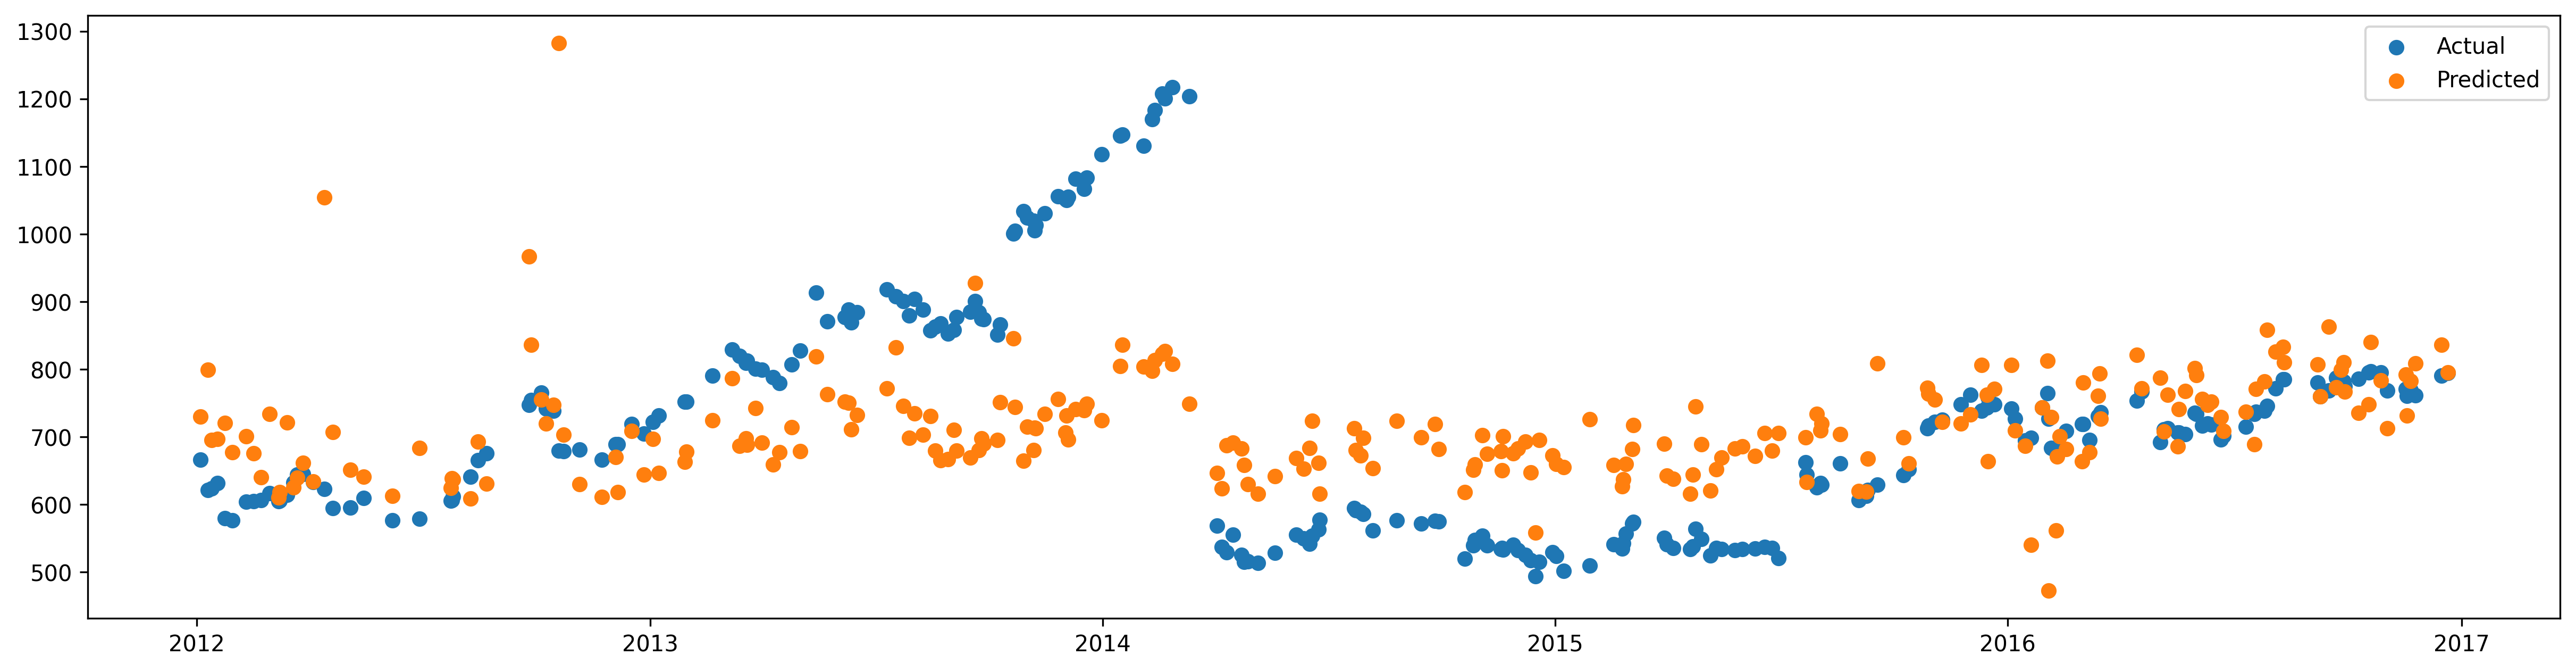

In [96]:
sr = pd.Series(y_test)
sr = sr.to_frame()

plt.figure(figsize=(20,5),dpi=300)
plt.scatter(x=sr.index,y=sr['Close'],label='Actual')
plt.scatter(x=sr.index,y=y_pred,label='Predicted')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test,y_pred))

151.98288998547622

In [43]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.1557538922176095